In [1]:
import mediapipe as mp
import cv2
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy.interpolate import interp1d

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [3]:
cap = cv2.VideoCapture("/media/jayasanka/New Volume/cs/AI/gait recognition/Full-Body-Estimation-using-Media-Pipe-Holistic/calibration/meter2.mp4")

meter_key=[]

start = time.time()
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.9) as holistic:
    idx=0
    while cap.isOpened():
        ret, frame = cap.read()
        
        if ret==False:
            break
            
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Right hand
        #mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Left Hand
        #mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
        #print(results.pose_landmarks)
        #print("--------------------------------------")
        
        
        if cv2.waitKey(10) & 0xFF == ord('s'):
            meter_key.append([results.pose_landmarks.landmark[15].y,results.pose_landmarks.landmark[16].y])
            print(1)
        
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            #idx=0
        
            
end = time.time()
print(end - start)

cap.release()
cv2.destroyAllWindows()

1
1
1
1
1
57.15473747253418


In [4]:
meter_key

[[0.4878220558166504, 0.5463026165962219],
 [0.4603784680366516, 0.5322966575622559],
 [0.42388415336608887, 0.5165591835975647],
 [0.3571341633796692, 0.4910348057746887],
 [0.181613028049469, 0.4191688895225525]]

In [6]:
meter=[]
for i in range(len(meter_key)):
    y=abs(meter_key[i][0]-meter_key[i][1])
    meter.append(y)
meter_array = np.array(meter)
print(meter_array)

[0.05848056 0.07191819 0.09267503 0.13390064 0.23755586]


In [9]:
distance=[5,4,3,2,1]

In [10]:
df_m = pd.DataFrame({"d": distance,
                   "m": meter_array})
print(df_m)

   d         m
0  5  0.058481
1  4  0.071918
2  3  0.092675
3  2  0.133901
4  1  0.237556


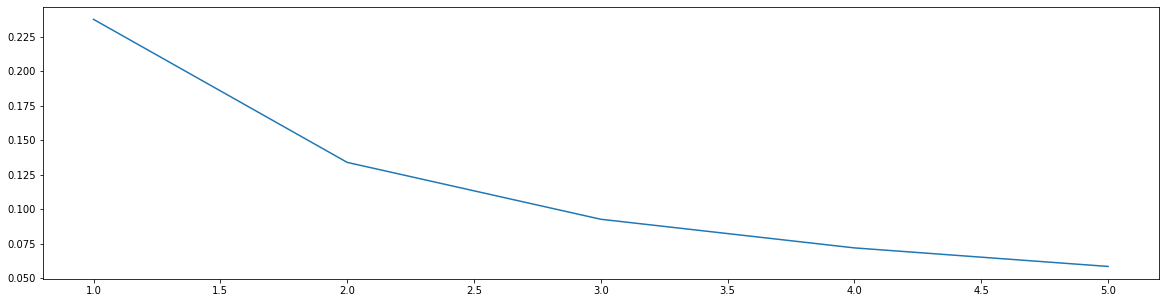

In [11]:
plt.figure(figsize=(20,5))
plt.plot(df_m.d,df_m.m)
#plt.ylim(0,1.0)
plt.show()

In [14]:
m_interp = interp1d(df_m.d,df_m.m,fill_value="extrapolate")

In [34]:
cap = cv2.VideoCapture("/media/jayasanka/New Volume/cs/AI/gait recognition/Full-Body-Estimation-using-Media-Pipe-Holistic/calibration/v1.mp4")

walk_key=[]

start = time.time()
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.9) as holistic:
    idx=0
    while cap.isOpened():
        ret, frame = cap.read()
        
        if ret==False:
            break
            
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Right hand
        #mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Left Hand
        #mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
        #print(results.pose_landmarks)
        #print("--------------------------------------")
        
        time.sleep(0.1)
        
        if cv2.waitKey(10) & 0xFF == ord('s'):
            walk_key.append([results.pose_landmarks.landmark[11].y,results.pose_landmarks.landmark[12].y,results.pose_landmarks.landmark[23].y,results.pose_landmarks.landmark[24].y])
            print(1)
        
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            #idx=0
        
            
end = time.time()
print(end - start)

cap.release()
cv2.destroyAllWindows()

1
1
1
1
1
34.1373565196991


In [35]:
ubh=[]
for i in range(len(walk_key)):
    he=abs((walk_key[i][0]+walk_key[i][1])-(walk_key[i][2]+walk_key[i][3]))/2
    ubh.append(he)
ubh_array = np.array(ubh)
print(ubh_array)

[0.07430062 0.08156298 0.10970642 0.15228462 0.23015743]


In [36]:
distance=[5,4,3,2,1]

In [37]:
df_h = pd.DataFrame({"d": distance,
                   "h": ubh_array})
print(df_h)

   d         h
0  5  0.074301
1  4  0.081563
2  3  0.109706
3  2  0.152285
4  1  0.230157


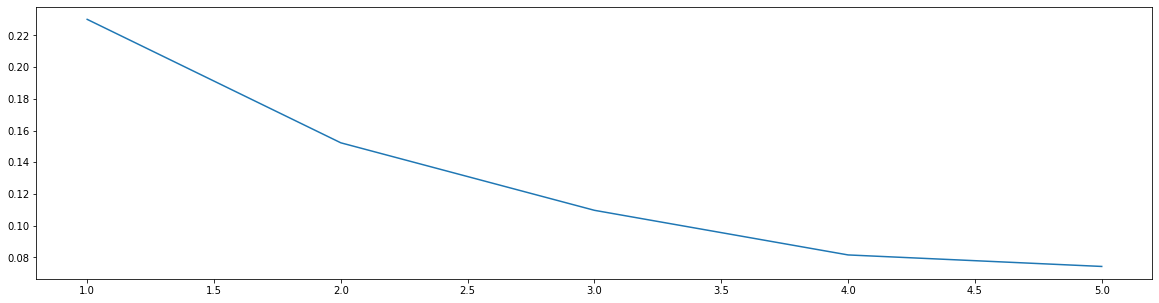

In [38]:
plt.figure(figsize=(20,5))
plt.plot(df_h.d,df_h.h)
#plt.ylim(0,1.0)
plt.show()

In [39]:
h_interp = interp1d(df_h.h,df_h.d,fill_value="extrapolate")

In [40]:
cap = cv2.VideoCapture("/media/jayasanka/New Volume/cs/AI/gait recognition/Full-Body-Estimation-using-Media-Pipe-Holistic/calibration/1.mp4")



myarray = np.empty(shape=(1,33,4))

start = time.time()
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.9) as holistic:
    idx=0
    while cap.isOpened():
        ret, frame = cap.read()
        
        if ret==False:
            break
            
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Draw face landmarks
        #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
        
        # Right hand
        #mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Left Hand
        #mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
        #print(results.pose_landmarks)
        #print("--------------------------------------")
        
        if results.pose_landmarks != None:
            key_list= []
            t=time.time()
            for data_point in results.pose_landmarks.landmark:
                key_list.append([data_point.x,data_point.y,data_point.z,t])    
            mat = np.array(key_list)
            myarray = np.vstack([myarray,[mat]])
        
        idx+=1
        
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            #idx=0
        
            
end = time.time()
print(end - start)

cap.release()
cv2.destroyAllWindows()
key_array = np.delete(myarray, 0, 0)

9.048734188079834


In [45]:
shoulder=[]
H_array=[]
for i in range(len(key_array)):
    t=key_array[i][11][3]
    H=abs((key_array[i][11][1]+key_array[i][12][1])-(key_array[i][23][1]+key_array[i][24][1]))/2
    H_array.append(H)
    d=h_interp(H)
    m=m_interp(d)*2
    y=abs(key_array[i][11][0]-key_array[i][12][0])
    sholder_lenth_pm=y/m
    shoulder.append([y])
    shoulder[i].append(d)
    shoulder[i].append(m)
    shoulder[i].append(sholder_lenth_pm)
    shoulder[i].append(t)

shoulder_array = np.array(shoulder)
print(shoulder_array)


[[9.36082602e-02 4.20902232e+00 1.38218850e-01 6.77246699e-01
  1.63354777e+09]
 [9.27297473e-02 4.37066576e+00 1.33874641e-01 6.92661032e-01
  1.63354777e+09]
 [9.25398767e-02 4.46637558e+00 1.31302415e-01 7.04784269e-01
  1.63354777e+09]
 [9.23682153e-02 4.48191617e+00 1.30884758e-01 7.05721711e-01
  1.63354777e+09]
 [9.22923684e-02 4.61636050e+00 1.27271532e-01 7.25161134e-01
  1.63354777e+09]
 [9.15509164e-02 4.75655817e+00 1.23503683e-01 7.41280859e-01
  1.63354777e+09]
 [9.14194584e-02 4.95995642e+00 1.18037303e-01 7.74496333e-01
  1.63354777e+09]
 [9.16191936e-02 4.98339246e+00 1.17407453e-01 7.80352447e-01
  1.63354777e+09]
 [9.19229388e-02 4.94139964e+00 1.18536021e-01 7.75485272e-01
  1.63354777e+09]
 [9.23316479e-02 4.91691716e+00 1.19193994e-01 7.74633390e-01
  1.63354777e+09]
 [9.28216577e-02 4.91955787e+00 1.19123024e-01 7.79208369e-01
  1.63354777e+09]
 [9.33256149e-02 4.95960350e+00 1.18046788e-01 7.90581571e-01
  1.63354777e+09]
 [9.35710073e-02 5.06506364e+00 1.152125

In [47]:
df = pd.DataFrame(shoulder_array,columns=['s','d','m','slpm','t'])
print(df)

            s         d         m      slpm             t
0    0.093608  4.209022  0.138219  0.677247  1.633548e+09
1    0.092730  4.370666  0.133875  0.692661  1.633548e+09
2    0.092540  4.466376  0.131302  0.704784  1.633548e+09
3    0.092368  4.481916  0.130885  0.705722  1.633548e+09
4    0.092292  4.616360  0.127272  0.725161  1.633548e+09
..        ...       ...       ...       ...           ...
164  0.358382  0.153329  0.650635  0.550818  1.633548e+09
165  0.362482  0.091323  0.663490  0.546327  1.633548e+09
166  0.362360  0.091117  0.663533  0.546107  1.633548e+09
167  0.368101  0.040237  0.674081  0.546078  1.633548e+09
168  0.370757  0.006174  0.681142  0.544317  1.633548e+09

[169 rows x 5 columns]


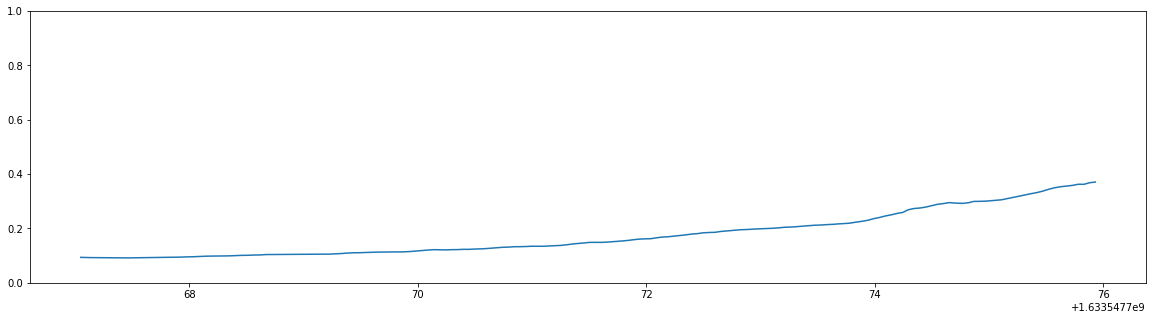

In [48]:
plt.figure(figsize=(20,5))
plt.plot(df.t,df.s)
plt.ylim(0,1.0)
#plt.xlim(0,1.0)
plt.show()

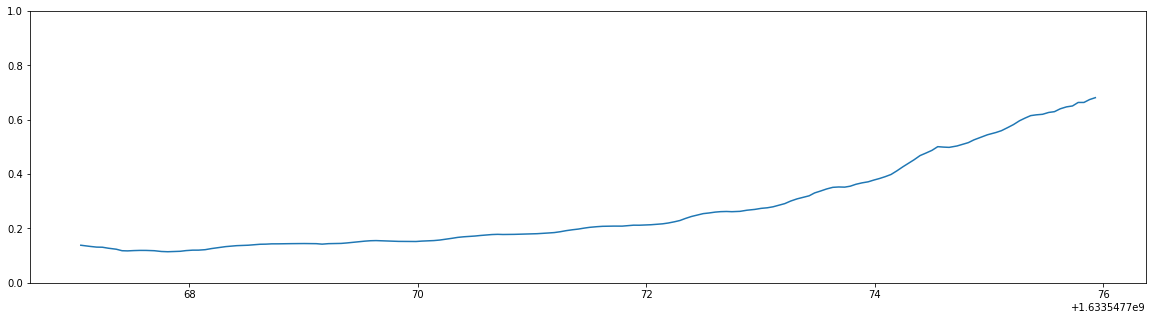

In [49]:
plt.figure(figsize=(20,5))
plt.plot(df.t,df.m)
plt.ylim(0,1.0)
#plt.xlim(0,1.0)
plt.show()

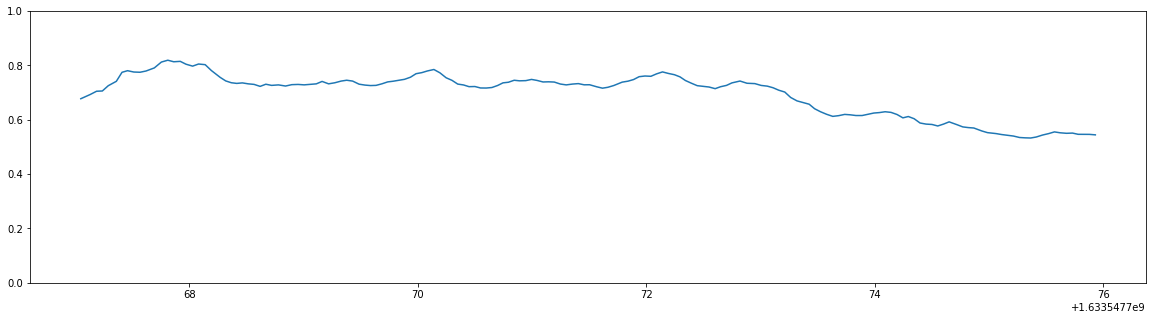

In [50]:
plt.figure(figsize=(20,5))
plt.plot(df.t,df.slpm)
plt.ylim(0,1.0)
#plt.xlim(0,1.0)
plt.show()

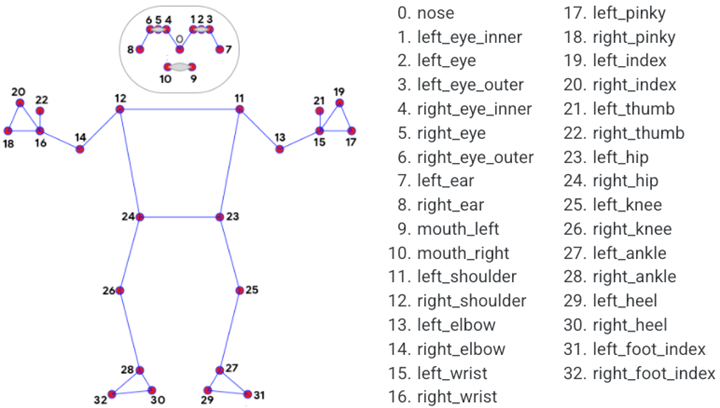